In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df = pd.read_csv('dataset.csv')
names = df.iloc[0]
df = df.drop(0) # se elimina la primera fila de nombres

df.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
for c in df:
    df[c] = df[c].astype('float64')
    #df[c] = df[c].astype('int64')
df.describe()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [18]:
X = df.drop('Y', axis=1)
y = df['Y']


from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder(sparse=False,categories='auto')
sex = OHE.fit_transform(X[['X2']])
marriage = OHE.fit_transform(X[['X4']])
education = OHE.fit_transform(X[['X3']])

cat_variables = np.hstack((sex, marriage, education))

cat_var_names = ['X2','X4','X3']

num_variables = X.drop(cat_var_names, axis=1)


#X_cats = df[['X2','X4','X3']]
#X_nums = X.drop(['X2','X4','X3'],axis=1)
#X_nums.head()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(num_variables)
stdz_num_variables = scaler.transform(num_variables)

final_X = np.hstack((cat_variables,stdz_num_variables))
final_X

#scaler = StandardScaler().fit(X_nums)
#X_nums_scaled = scaler.transform(X_nums)
#pd.DataFrame(X_nums_scaled).describe()
#pd.concat([pd.DataFrame(X_nums_scaled), X_cats], axis=1)

array([[ 0.        ,  1.        ,  0.        , ..., -0.30806256,
        -0.31413612, -0.29338206],
       [ 0.        ,  1.        ,  0.        , ..., -0.24422965,
        -0.31413612, -0.18087821],
       [ 0.        ,  1.        ,  0.        , ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.03996431,
        -0.18322937, -0.11900109],
       [ 1.        ,  0.        ,  0.        , ..., -0.18512036,
         3.15253642, -0.19190359],
       [ 1.        ,  0.        ,  0.        , ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [25]:
# Se seleccionan las 10 mejores caracteristicas

from sklearn.feature_selection import SelectKBest

test = SelectKBest(k=10)
fit = test.fit(final_X,y)
np.set_printoptions(precision=1)
print(fit.scores_)
features = fit.transform(final_X)

features.shape

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.33, random_state=42)


[4.8e+01 4.8e+01 5.2e+00 2.7e+01 2.8e+01 2.9e+00 4.0e+00 7.9e+01 4.0e+01
 3.2e+01 1.9e+01 4.0e+01 1.2e+00 5.8e+00 7.2e+02 5.8e+00 3.5e+03 2.2e+03
 1.8e+03 1.5e+03 1.3e+03 1.1e+03 1.2e+01 6.0e+00 5.9e+00 3.1e+00 1.4e+00
 8.7e-01 1.6e+02 1.0e+02 9.5e+01 9.7e+01 9.1e+01 8.5e+01]


(30000, 10)

In [26]:
# Dividir el conjunto en tres: Entrenamiento(24,000), Validacion(3,000), Test (3,000)
# 3,000 es suficiente par dar precision de 0.033% en validacion y test
# Usamos para todos para que comparamos manzanas con manzanas.

from sklearn.model_selection import train_test_split
# Siempre queremos lo mismo conjunto de trainval y test
# Entonces random_state = 77
#X_entrenval, X_test, y_entrenval, y_test = train_test_split(X, y, test_size=3000, random_state=77)
X_entrenval, X_test, y_entrenval, y_test = train_test_split(features, y, test_size=3000, random_state=77)

# Mejor que permitimos que cambia los conjuntos de train y val
# Entonces por casualidad entre entren y val
X_entren, X_val, y_entren, y_val = train_test_split(X_entrenval, y_entrenval, test_size=3000)
X_entrenval.shape, X_entren.shape, X_val.shape, X_test.shape, y_entrenval.shape, y_entren.shape, y_val.shape, y_test.shape
# Reconstruir pandas dataframe solo de los datos de entrenval.
#dftv = pd.concat([X_entrenval, y_entrenval], axis=1)

((27000, 10),
 (24000, 10),
 (3000, 10),
 (3000, 10),
 (27000,),
 (24000,),
 (3000,),
 (3000,))

In [71]:
#X_entren.shape, y_entren.shape

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_entren, y_entren = smote.fit_sample(X_entren, y_entren)

X_entren.shape, y_entren.shape


((37356, 10), (37356,))

In [78]:
from sklearn.svm import SVC

#svcModel = SVC(kernel='rbf', C=1, gamma=50, probability=True)
#svcModel.fit(X_scaled, y_entren_os)

svcModel = SVC(kernel='rbf',gamma='auto',probability=True)
svcModel.fit(X_entren,y_entren)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [79]:
svcModel.score(X_entren, y_entren)

0.7173412570939073

In [80]:
svcModel.score(X_val, y_val)

0.7673333333333333

In [81]:
#Xval_scaled = scaler.transform(X_val)
#svcTrainScore = svcModel.score(final_X,y_entren_os)
#svcValScore = svcModel.score(Xval_scaled,y_val)

svcTrainScore = svcModel.score(X_entren,y_entren)
svcValScore = svcModel.score(X_val,y_val)

print('linea base')
print('\n e.1 Con el clasificador SVM')
print('-----------------------------------')
print('Score Entrenamiento: ' + str(svcTrainScore))
print('Score Validacion: ' + str(svcValScore))


from ipynb.fs.full.costo import custom_cost

#función de costo
print('\nEntrenamiento')
custom_cost(svcModel, X_entren, y_entren)
print('\nValidacion')
custom_cost(svcModel, X_val, y_val)
print()

linea base

 e.1 Con el clasificador SVM
-----------------------------------
Score Entrenamiento: 0.7173412570939073
Score Validacion: 0.7673333333333333

Entrenamiento
Exactitud:     0.7173412570939073
Precisión:     0.7912332305043404
Exhaustividad: 0.590480779526716
Costo por cliente: 0.8064567940893029

Validacion
Exactitud:     0.7673333333333333
Precisión:     0.4917825537294564
Exhaustividad: 0.5678832116788322
Costo por cliente: 0.49766666666666665



In [82]:
# define the function to estimate empirical probabilities.
# returns predicted probability (trimmed by n on both sides)
# and empirical probability calculated by Yeh's SMM method.
import numpy as np
def getPQprobs(y, y_prob, n=50):
    frame = { 'y': y, 'y_prob': y_prob } 
    df = pd.DataFrame(frame)
    df = df.sort_values(['y_prob'])
    y = df.y
    y_prob = df.y_prob
    prob_smm = []
    denom = 2*n + 1
    for i in range(n, len(y)-n):
        p = y[i-n:i+n+1].sum()/denom
        prob_smm.append(p)
    prob_pred = np.array(y_prob[n:len(y)-n])
    prob_smm = np.array(prob_smm)
    return (prob_pred, prob_smm)

# plot actual versus predicted probabilities sorted ascending on predicted.
import matplotlib.pyplot as plt
%matplotlib inline
def plotPQ(prob_emp, prob_pred):
    plt.rcParams.update({'font.size': 9})
    plt.plot(prob_pred, prob_emp, label= ("Empirical x Prediccion") )
    plt.xlabel("Prob Predicción")
    plt.ylabel("Prob Empirical")
    from scipy.stats import entropy
    kld = entropy(pk=prob_emp, qk=prob_pred)
    from scipy.spatial import distance
    jsd = distance.jensenshannon(prob_emp, prob_pred)
    plt.title(("Curva Probabilidades (KL div = %.4f, JS div = %.4f)" % (kld, jsd)))

# Combine the procedures
def mostrarPQ(y, y_prob):
    prob_pred, prob_smm = getPQprobs(y, y_prob)
    plotPQ(prob_smm, prob_pred)


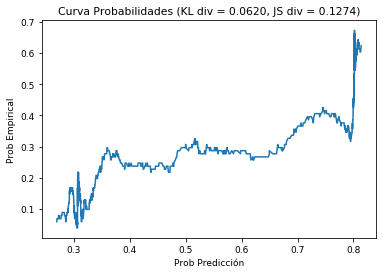

In [83]:
#from ipynb.fs.full.prob import mostrarPQ

#mostrar probabilidades empiricales vs predicción
y_val_prob = svcModel.predict_proba(X_val)[:,1] # Probability of category +1
mostrarPQ(y_val, y_val_prob)